In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


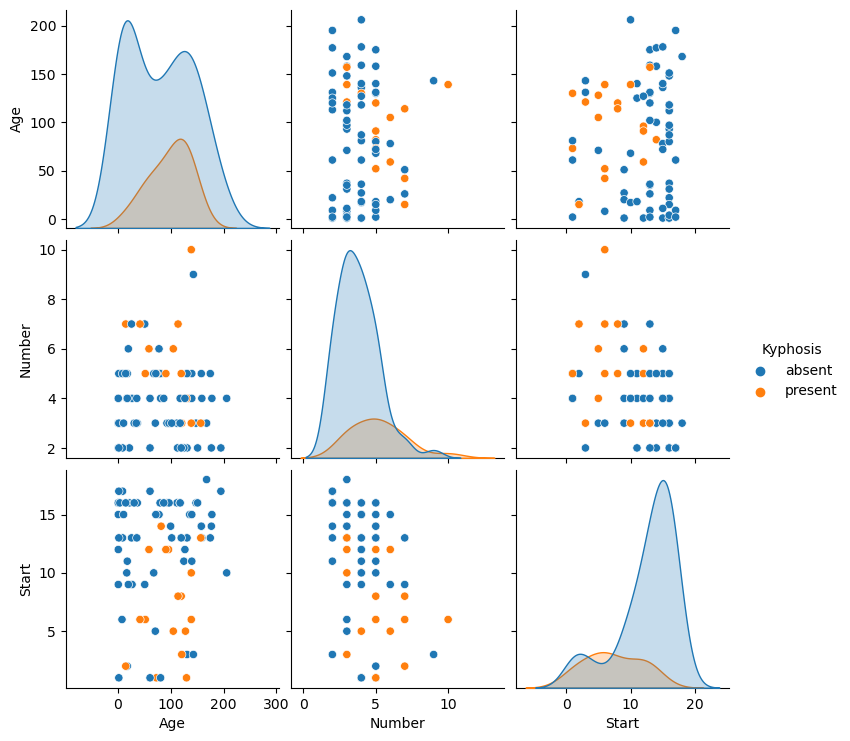

In [7]:
sns.pairplot(df, hue='Kyphosis')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

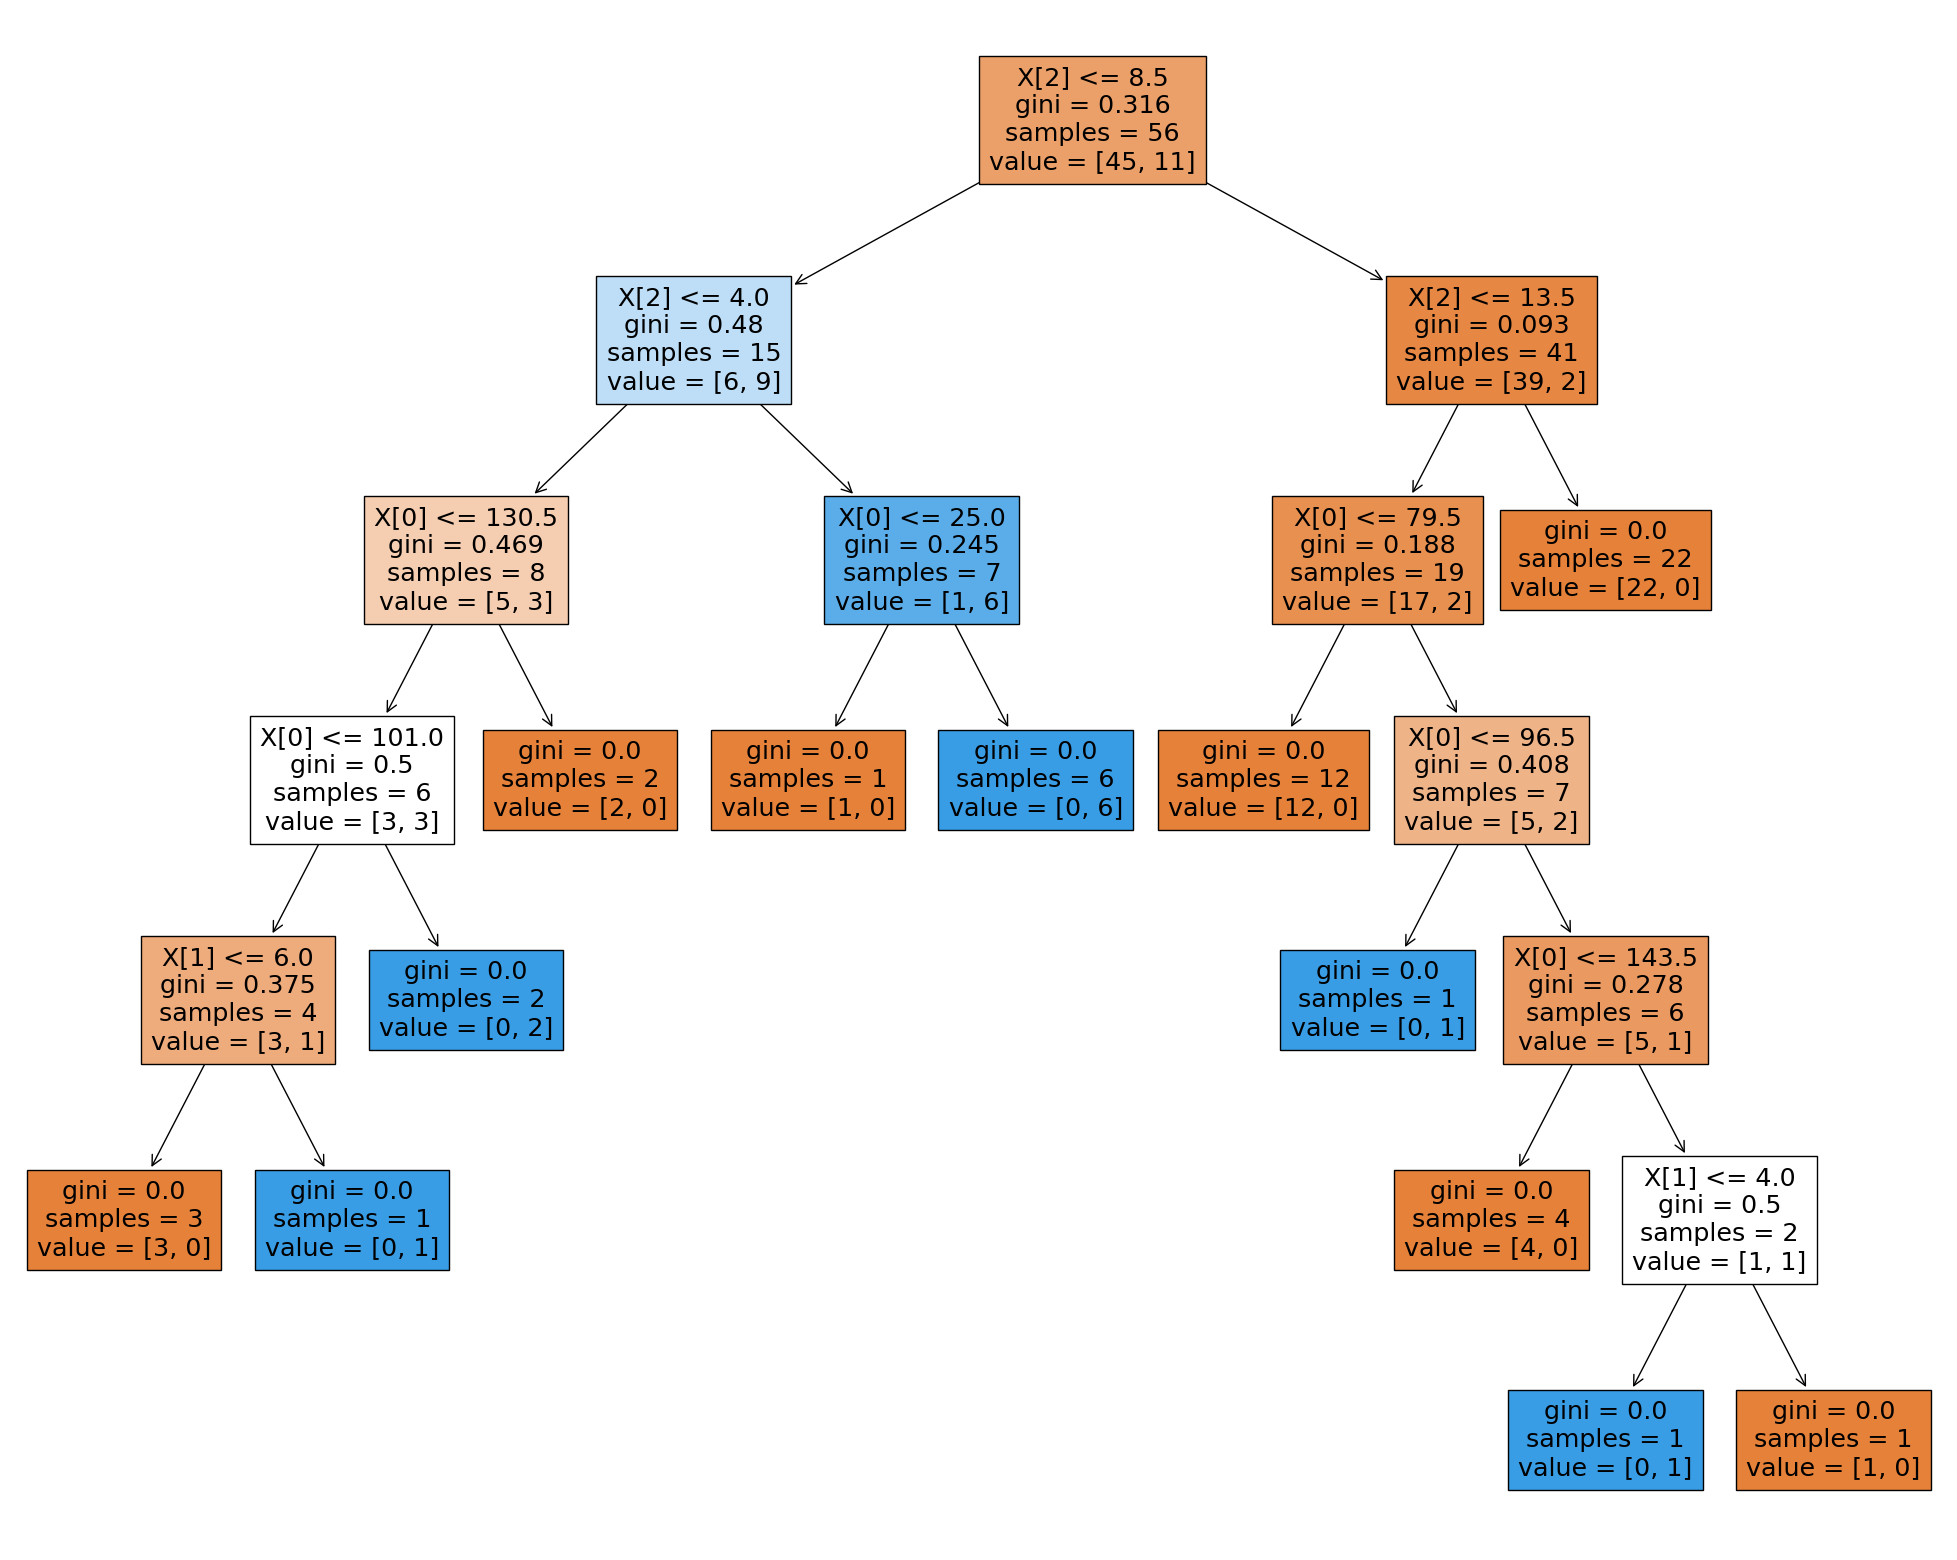

In [34]:
#visualising descsion tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

In [14]:
pred = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[17  2]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
Rforest = RandomForestClassifier(n_estimators=200)

In [19]:
Rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
rf_pred = Rforest.predict(X_test)

In [21]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [22]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64